In [3]:
! pip install mplfinance

In [2]:
! pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 1.1 MB/s eta 0:00:00 0:00:01
  Created wheel for peewee: filename=peewee-3.17.5-cp311-cp311-macosx_11_0_arm64.whl size=246421 sha256=a49b29ba4f6825d8882feaded5a10b4780eda37d60312d6958f073dbdb73eafa
  Stored in directory: /Users/zeddpai/Library/Caches/pip/wheels/d2/cb/9c/c300d7bf782e07f1658c306743d5e30af7e4834001e4064a96
Successfully built peewee


In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import requests
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
# set tickers
# tickers = ["^GSPC", "EURUSD=X", "USDJPY=X"]
ticker = "^GSPC"
# set the start date and end date
start = "1985-01-01"
end = "2020-06-30"

In [3]:
df = yf.download(ticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-02,167.199997,167.199997,165.190002,165.369995,165.369995,67820000
1985-01-03,165.369995,166.110001,164.380005,164.570007,164.570007,88880000
1985-01-04,164.550003,164.550003,163.360001,163.679993,163.679993,77480000
1985-01-07,163.679993,164.710007,163.679993,164.240005,164.240005,86190000
1985-01-08,164.240005,164.589996,163.910004,163.990005,163.990005,92110000
...,...,...,...,...,...,...
2020-06-23,3138.699951,3154.899902,3127.120117,3131.290039,3131.290039,4711850000
2020-06-24,3114.399902,3115.010010,3032.129883,3050.330078,3050.330078,5597680000
2020-06-25,3046.600098,3086.250000,3024.010010,3083.760010,3083.760010,4847690000


In [4]:
df = pd.read_csv("btcusdt_klines_full.csv")
df

,Open,High,Low,Close,Volume,Open time
0,63273.58,67789.00,63273.58,67525.83,54442.094554,1636329600000
1,67525.82,68524.25,66222.40,66947.66,44661.378068,1636416000000
2,66947.67,69000.00,62822.90,64882.43,65171.504046,1636502400000
3,64882.42,65600.07,64100.00,64774.26,37237.980580,1636588800000
4,64774.25,65450.70,62278.00,64122.23,44490.108160,1636675200000
...,...,...,...,...,...,...
2541,3660.27,3680.02,3625.13,3665.18,24759.833719,1549670400000
2542,3665.18,3684.99,3609.76,3680.06,23250.602634,1549756800000
2543,3679.75,3684.90,3615.53,3631.05,24954.614571,1549843200000
2544,3631.05,3667.60,3582.34,3631.46,29479.598230,1549929600000


In [5]:
# split the dataset into trainset and test
# The last 4 years is the test set
test_df = df[-365:]
train_df = df[: len(df) - 365]

In [6]:
test_df["Date"] = pd.to_datetime(test_df["Open time"], unit="ms")
test_df.set_index("Date", inplace=True)
test_df

/var/folders/ct/yp6fq1h14hdcbn7td3nvnh840000gr/T/ipykernel_69802/3833810765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Date"] = pd.to_datetime(test_df["Open time"], unit="ms")


,Open,High,Low,Close,Volume,Open time
Date,,,,,,
2018-02-14,8535.17,9489.60,8533.00,9449.99,40811.952867,1518566400000
2018-02-15,9449.98,10219.50,9301.50,10000.09,52427.596715,1518652800000
2018-02-16,10000.89,10323.37,9666.00,10159.98,38161.205974,1518739200000
2018-02-17,10156.07,11075.07,10050.00,11039.55,41882.108407,1518825600000
2018-02-18,11039.55,11274.00,10080.00,10383.43,61137.380728,1518912000000
...,...,...,...,...,...,...
2019-02-09,3660.27,3680.02,3625.13,3665.18,24759.833719,1549670400000
2019-02-10,3665.18,3684.99,3609.76,3680.06,23250.602634,1549756800000
2019-02-11,3679.75,3684.90,3615.53,3631.05,24954.614571,1549843200000


In [7]:
train_df["Date"] = pd.to_datetime(train_df["Open time"], unit="ms")
train_df.set_index("Date", inplace=True)
train_df

/var/folders/ct/yp6fq1h14hdcbn7td3nvnh840000gr/T/ipykernel_69802/4050944772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Date"] = pd.to_datetime(train_df["Open time"], unit="ms")


,Open,High,Low,Close,Volume,Open time
Date,,,,,,
2021-11-08,63273.58,67789.00,63273.58,67525.83,54442.094554,1636329600000
2021-11-09,67525.82,68524.25,66222.40,66947.66,44661.378068,1636416000000
2021-11-10,66947.67,69000.00,62822.90,64882.43,65171.504046,1636502400000
2021-11-11,64882.42,65600.07,64100.00,64774.26,37237.980580,1636588800000
2021-11-12,64774.25,65450.70,62278.00,64122.23,44490.108160,1636675200000
...,...,...,...,...,...,...
2018-02-09,7789.90,8738.00,7789.90,8683.92,20482.910825,1518134400000
2018-02-10,8683.93,9065.78,8120.00,8533.98,49381.512653,1518220800000
2018-02-11,8533.99,8549.00,7726.53,8063.88,45025.187952,1518307200000


In [8]:
# A function to return the start dates array
def start_dates(dframe, df_start, term_days, ahead_days):
  return np.arange(0, len(dframe)-term_days - ahead_days, int(term_days/3)) # 10 days sliding

In [9]:
# Not used yet
# A function to compute the momemtum return
# This function works only inside the candle_stick function
def momentum_ret(df_start, term_days, ahead_days): 
    # set the start date and ending date
    df_start = df_start
    df_end = df_start + term_days
    df_flag_date = df_end + ahead_days

    # set the starting date to determine the momentum factor
    df_mom_start = df_end - 5

    # grab the price
    mom_start_price = df[df_mom_start:df_mom_start+1].Close.values 
    final_price = df[df_end:df_end+1].Close.values
    flag_price = df[df_flag_date:df_flag_date+1].Close.values

    # set the strategy and compute the return
    if final_price > mom_start_price*1.05:
      strategy = "long"
      profit = (flag_price - final_price) / final_price

    elif final_price < mom_start_price*0.95:
      strategy = "short"
      profit = (final_price - flag_price) / final_price

    else:
      strategy = "no position"
      profit = 0

    return (strategy, profit)

In [10]:
# A function to return the flag(up, flat, or down)
# This function works only inside the candle_stick function
def three_flags(df_start, term_days, ahead_days): 
    df_start = df_start
    df_end = df_start + term_days
    df_flag_date = df_end + ahead_days 
    final_price = df[df_end:df_end+1].Close.values
    flag_price = df[df_flag_date:df_flag_date+1].Close.values

    if flag_price > final_price*1.1:
      flag = "up"
    elif flag_price < final_price*0.9:
      flag = "down"
    else:
      flag = "flat"

    return flag

In [11]:
import os


# A function to create a candle_stick with MA25 and store it to a directory with the first date in its file name
# pass dataframe from the yfinace as the first argument
# The 2nd argument is the start_date index of the datafrtame
# The 3rd argument is the term of the subset dataframe, i.e. set 30 for 30 days
# The 4th argument is the forecaset period, i.e. set 3 for 3 days ahead foracasting
# Set "train" or "test" for the 5th argument
def candle_stick(dframe, df_start, term_days, ahead_days, test_or_train):
    df_start = df_start
    df_end = df_start + term_days

    df = dframe[df_start:df_end]

    # grab the first date in the dataframe
    date_from = str(df.index[0])[:10]

    # extract the rows from the original dataframe
    df = df[["Open", "High", "Low", "Close", "Volume"]]

    # rename the columns
    df.columns = ["Open", "High", "Low", "Close", "Volume"]

    # params for the candle stick
    mc = mpf.make_marketcolors(up="g", down="r")
    s = mpf.make_mpf_style(marketcolors=mc)

    # grab the flag by the three_flags fuinction
    flag = three_flags(df_start, term_days, ahead_days)

    # momentum function
    # strategy, profit = momentum_ret(df_start, term_days, ahead_days)

    # set the directory acoroding to the flag(up,flat, or down)
    # store the image data to a different directory
    dir = flag + "_data"

    # return the plot and save it to a specific directory with unique file name
    # mount on google drive before run this code or you can set other local directory
    # To run a classifier we should either inculde the flag (up, down, or flat) in the file name
    # or store the files in different directories according to its flag
    # Change the data_# number to store the data into different directories
    # Before returning the plot, ensure the directory exists
    directory_path = "./capstone_data/{}_data_3/{}/".format(test_or_train, dir)
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

    return mpf.plot(
        df,
        type="candle",
        mav=25,
        style=s,
        figratio=(15, 15),
        savefig="./capstone_data/{}_data_3/{}/{}_mpf_candle_{}.png".format(
            test_or_train, dir, flag, date_from
        ),
    )
    # f = vb ('{0}.csv'.format("test"), 'wb')

 Execute the funtion

Five days ahead

In [12]:
# Train_set
# Loop over the train set
# Three days ahead
for i_date in start_dates(train_df,0,30,5):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(train_df,i_date,30,5,"train")

In [13]:
# Test_set
# Loop over the test set
# Three days ahead
for i_date in start_dates(test_df,0,30,5):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(test_df,i_date,30,5,"test")

Three days ahead

In [14]:
# Train_set
# Loop over the train set
# Three days ahead
for i_date in start_dates(train_df,0,30,3):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(train_df,i_date,30,3,"train")

In [15]:
# Test_set
# Loop over the test set
# Three days ahead
for i_date in start_dates(test_df,0,30,3):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(test_df,i_date,30,3,"test")

One day ahead

In [16]:
# Train_set
# Loop over the train set
# One days ahead
for i_date in start_dates(train_df,0,30,1):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(train_df,i_date,30,1,"train")

In [17]:
# Test_set
# Loop over the test set
# One days ahead
for i_date in start_dates(test_df,0,30,1):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(test_df,i_date,30,1,"test")
  

In [18]:
df["Date"] = pd.to_datetime(df["Open time"], unit="ms")
df.set_index("Date", inplace=True)
df[["Open", "High", "Low", "Close"]] = df[
    ["Open", "High", "Low", "Close"]
].astype(float)
df["Volume"] = df["Volume"].astype(float)
df

,Open,High,Low,Close,Volume,Open time
Date,,,,,,
2021-11-08,63273.58,67789.00,63273.58,67525.83,54442.094554,1636329600000
2021-11-09,67525.82,68524.25,66222.40,66947.66,44661.378068,1636416000000
2021-11-10,66947.67,69000.00,62822.90,64882.43,65171.504046,1636502400000
2021-11-11,64882.42,65600.07,64100.00,64774.26,37237.980580,1636588800000
2021-11-12,64774.25,65450.70,62278.00,64122.23,44490.108160,1636675200000
...,...,...,...,...,...,...
2019-02-09,3660.27,3680.02,3625.13,3665.18,24759.833719,1549670400000
2019-02-10,3665.18,3684.99,3609.76,3680.06,23250.602634,1549756800000
2019-02-11,3679.75,3684.90,3615.53,3631.05,24954.614571,1549843200000


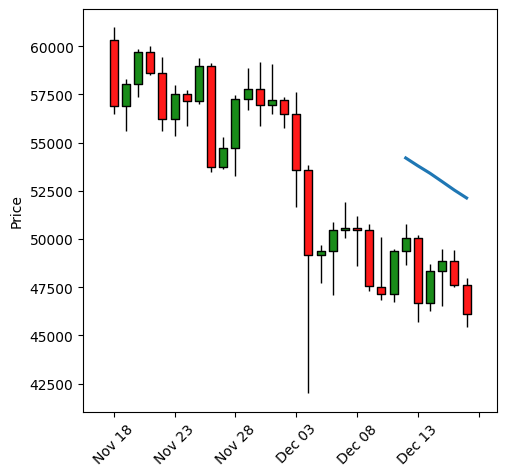

In [51]:
# a sample chart
mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df[10:40],type='candle', mav=25, style=s, figratio=(8,8))

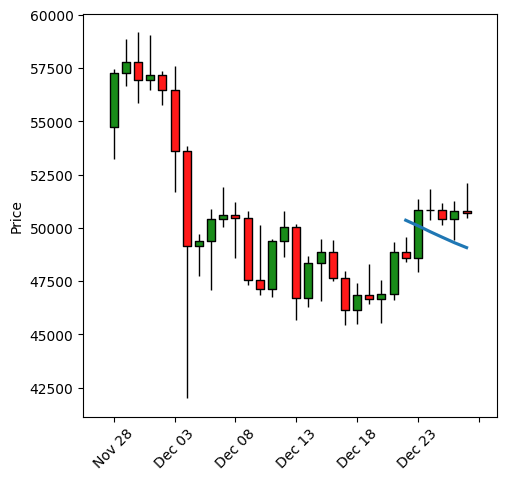

In [52]:
# a sample chart slinding 10 days
mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df[20:50],type='candle', mav=25, style=s, figratio=(8,8))